In [2]:
# Tahap 5 : Part-of-Speech (POS)

### Pastikan Anda sudah menginstal library yang dibutuhkan:
### pip install stanza pandas seaborn matplotlib openpyxl

In [3]:
import pandas as pd
import stanza
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Wede\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
print("Memulai Tahap 5: Analisis POS...")

# Download model Bahasa Indonesia (hanya perlu sekali)
try:
    stanza.download('id')
except Exception as e:
    print(f"Gagal mengunduh model Stanza, mungkin sudah ada. Error: {e}")

Memulai Tahap 5: Analisis POS...


2025-10-14 15:28:01 INFO: Downloaded file to C:\Users\Wede\stanza_resources\resources.json
2025-10-14 15:28:01 INFO: Downloading default packages for language: id (Indonesian) ...
2025-10-14 15:28:35 INFO: Downloaded file to C:\Users\Wede\stanza_resources\id\default.zip
2025-10-14 15:28:38 INFO: Finished downloading models and saved to C:\Users\Wede\stanza_resources


In [5]:
# Inisialisasi pipeline Stanza untuk POS tagging
print("Memuat model Stanza untuk Bahasa Indonesia...")
nlp = stanza.Pipeline('id', processors='tokenize,pos')
print("Model Stanza berhasil dimuat.")

2025-10-14 15:28:38 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


Memuat model Stanza untuk Bahasa Indonesia...


2025-10-14 15:28:38 INFO: Downloaded file to C:\Users\Wede\stanza_resources\resources.json
2025-10-14 15:28:38 WARNING: Language id package default expects mwt, which has been added
2025-10-14 15:28:38 INFO: Loading these models for language: id (Indonesian):
| Processor | Package    |
--------------------------
| tokenize  | gsd        |
| mwt       | gsd        |
| pos       | gsd_charlm |

2025-10-14 15:28:38 INFO: Using device: cpu
2025-10-14 15:28:38 INFO: Loading: tokenize
2025-10-14 15:28:40 INFO: Loading: mwt
2025-10-14 15:28:40 INFO: Loading: pos
2025-10-14 15:28:41 INFO: Done loading processors!


Model Stanza berhasil dimuat.


In [6]:
# --- Membaca Data ---
input_filepath = '../Data/hasil_final_analisis_transjakarta.csv' 
try:
    df = pd.read_csv(input_filepath)
    print(f"File '{input_filepath}' berhasil dibaca. Jumlah data: {len(df)} baris.")
except FileNotFoundError:
    print(f"Error: File '{input_filepath}' tidak ditemukan.")
    exit()

File '../Data/hasil_final_analisis_transjakarta.csv' berhasil dibaca. Jumlah data: 150 baris.


In [11]:
# --- Fungsi Analisis POS ---
def analyze_pos_by_sentiment(df_input, sentiment):
    """
    Menganalisis dan memvisualisasikan frekuensi kata berdasarkan POS untuk sentimen tertentu.
    """
    print(f"\\n--- Menganalisis Sentimen: {sentiment.upper()} ---")
    
    # Filter data berdasarkan sentimen
    df_sentiment = df_input[df_input['Sentimen'] == sentiment].copy()
    
    # Kumpulkan semua kata berdasarkan POS tag
    pos_words = {
        'NOUN': [], # Kata Benda
        'VERB': [], # Kata Kerja
        'ADJ': [],  # Kata Sifat
        'PROPN': [] # Kata Benda Properti (Nama)
    }
    
    # Gunakan Stanza untuk POS Tagging
    for text in df_sentiment['Teks_Stemmed'].dropna():
        doc = nlp(text)
        for sent in doc.sentences:
            for word in sent.words:
                if word.upos in pos_words:
                    pos_words[word.upos].append(word.text.lower())

    # Siapkan Excel writer untuk menyimpan hasil
    writer = pd.ExcelWriter(f'../Data/hasil_pos_{sentiment}.xlsx', engine='openpyxl')
    
    # Analisis dan visualisasi untuk setiap POS tag yang diminati
    for pos, words in pos_words.items():
        if not words:
            print(f"Tidak ada kata dengan POS tag '{pos}' ditemukan.")
            continue
            
        # Hitung frekuensi kata
        word_counts = Counter(words)
        df_counts = pd.DataFrame(word_counts.most_common(20), columns=['Kata', 'Frekuensi'])
        
        # Simpan daftar frekuensi kata ke sheet Excel
        df_counts.to_excel(writer, sheet_name=f'Top 20 {pos}', index=False)
        
        # Buat visualisasi
        plt.figure(figsize=(10, 8))
        sns.barplot(x='Frekuensi', y='Kata', data=df_counts.head(10), palette='viridis')
        plt.title(f'Top 10 {pos} (Kata Benda)' if pos == 'NOUN' else f'Top 10 {pos}', fontsize=16)
        plt.xlabel('Frekuensi', fontsize=12)
        plt.ylabel('Kata', fontsize=12)
        plt.show()

    writer.close()
    print(f"Hasil analisis untuk sentimen '{sentiment}' disimpan di 'hasil_pos_{sentiment}.xlsx'")

\n--- Menganalisis Sentimen: POSITIF ---


C:\Users\Wede\AppData\Local\Temp\ipykernel_33976\3791360630.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata', data=df_counts.head(10), palette='viridis')


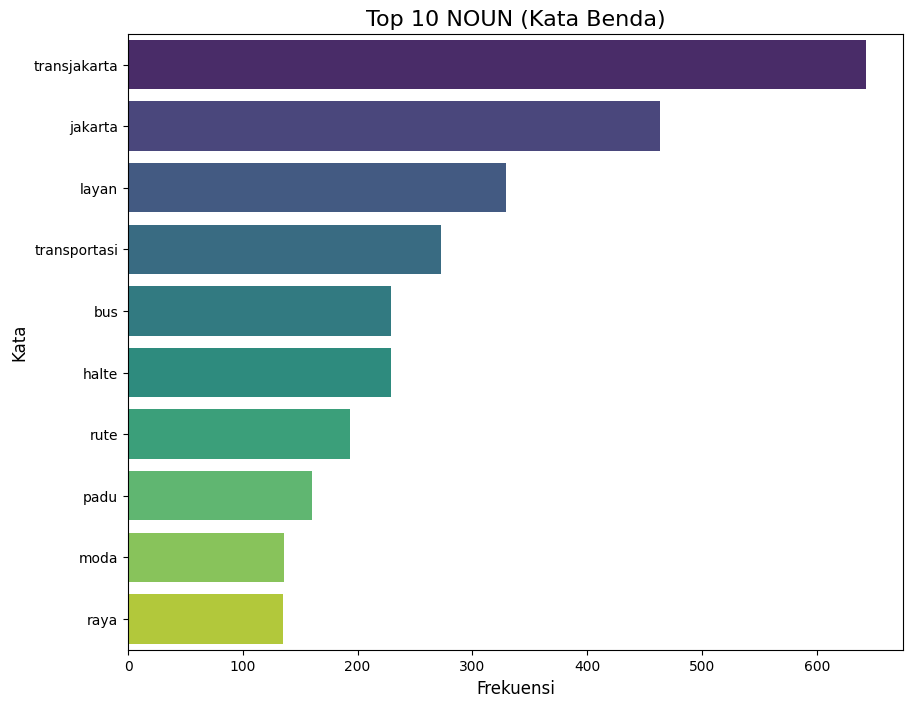

C:\Users\Wede\AppData\Local\Temp\ipykernel_33976\3791360630.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata', data=df_counts.head(10), palette='viridis')


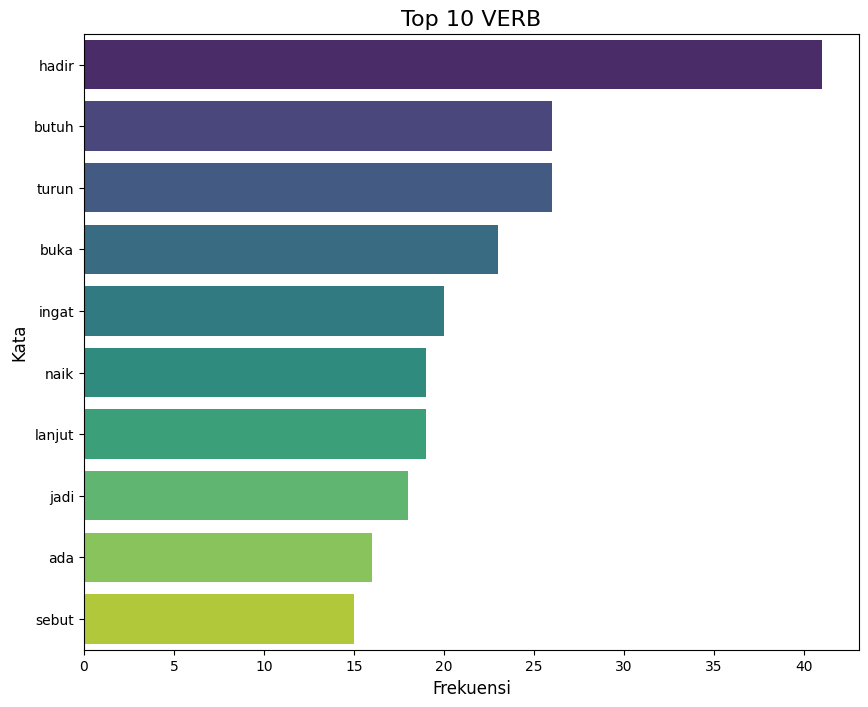

C:\Users\Wede\AppData\Local\Temp\ipykernel_33976\3791360630.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata', data=df_counts.head(10), palette='viridis')


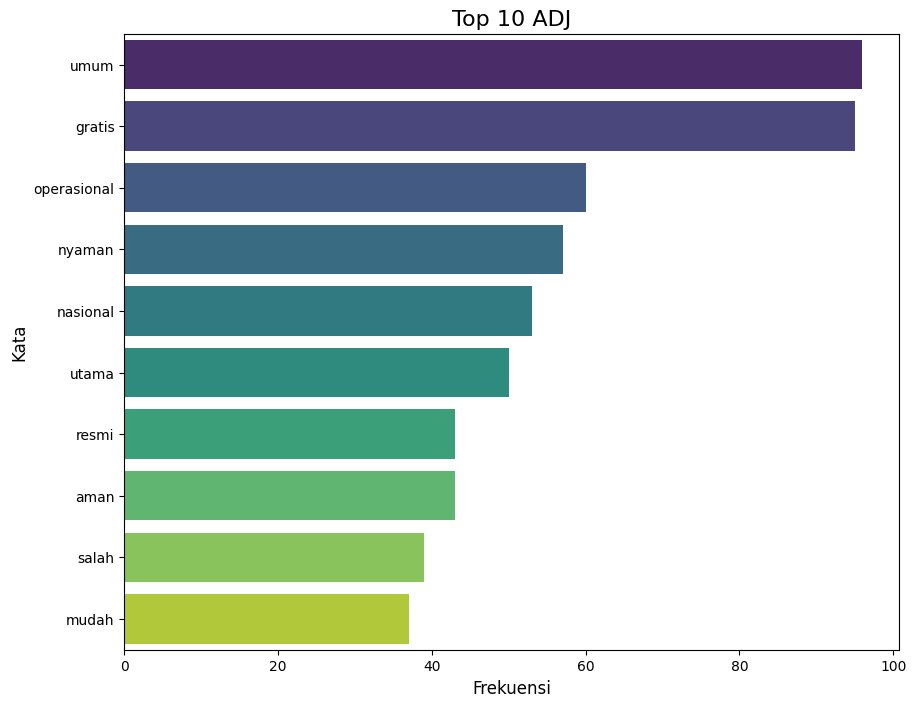

C:\Users\Wede\AppData\Local\Temp\ipykernel_33976\3791360630.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata', data=df_counts.head(10), palette='viridis')


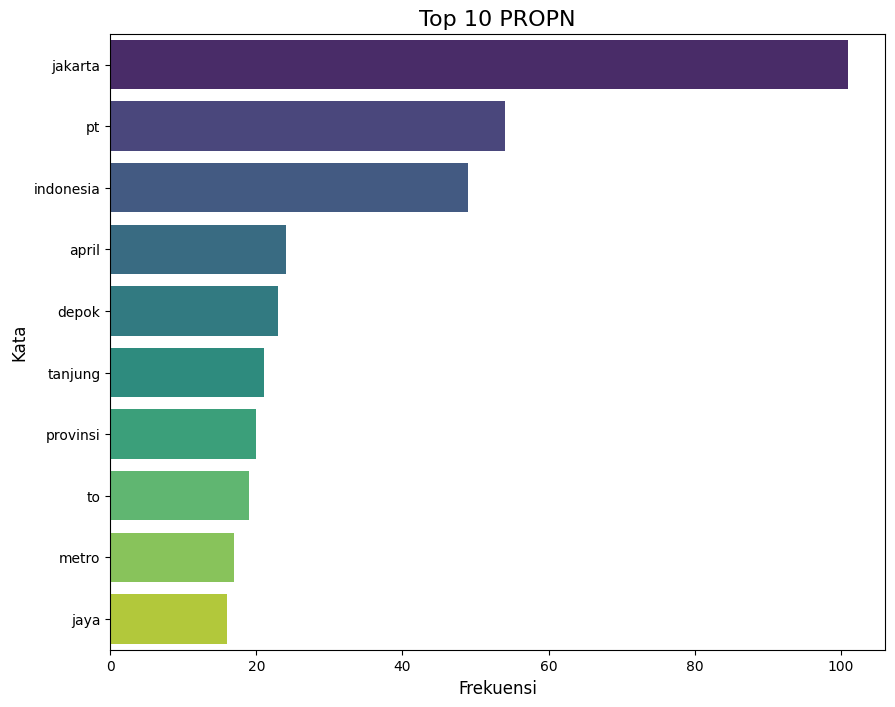

Hasil analisis untuk sentimen 'positif' disimpan di 'hasil_pos_positif.xlsx'
\n--- Menganalisis Sentimen: NEGATIF ---


C:\Users\Wede\AppData\Local\Temp\ipykernel_33976\3791360630.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata', data=df_counts.head(10), palette='viridis')


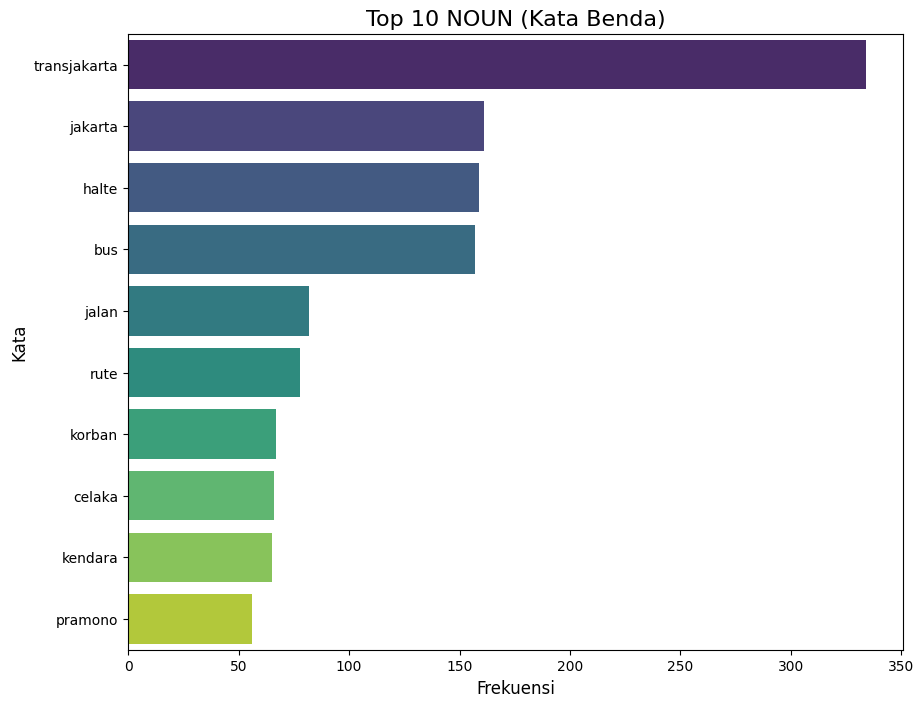

C:\Users\Wede\AppData\Local\Temp\ipykernel_33976\3791360630.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata', data=df_counts.head(10), palette='viridis')


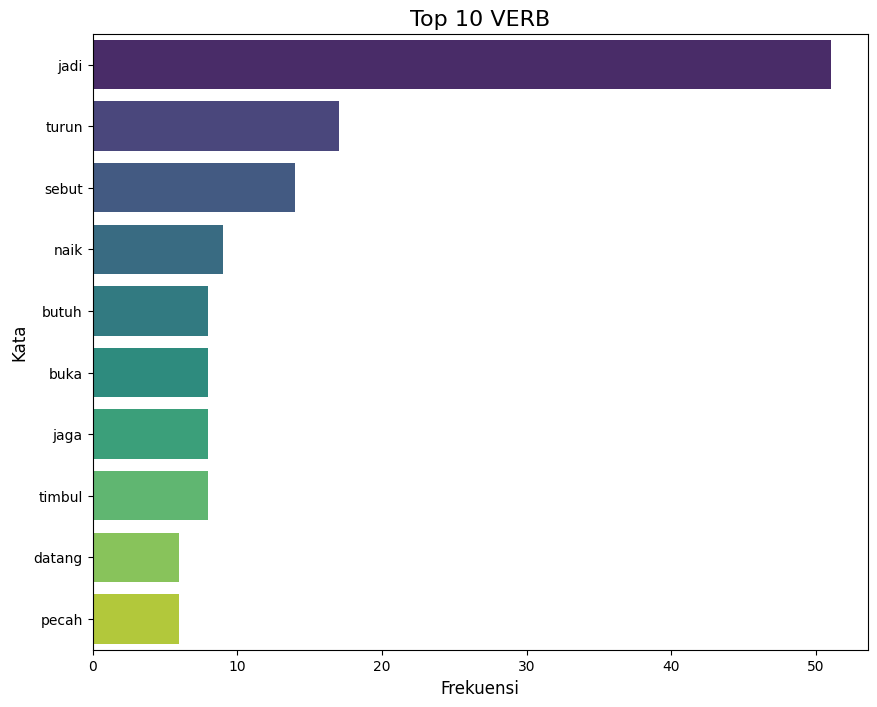

C:\Users\Wede\AppData\Local\Temp\ipykernel_33976\3791360630.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata', data=df_counts.head(10), palette='viridis')


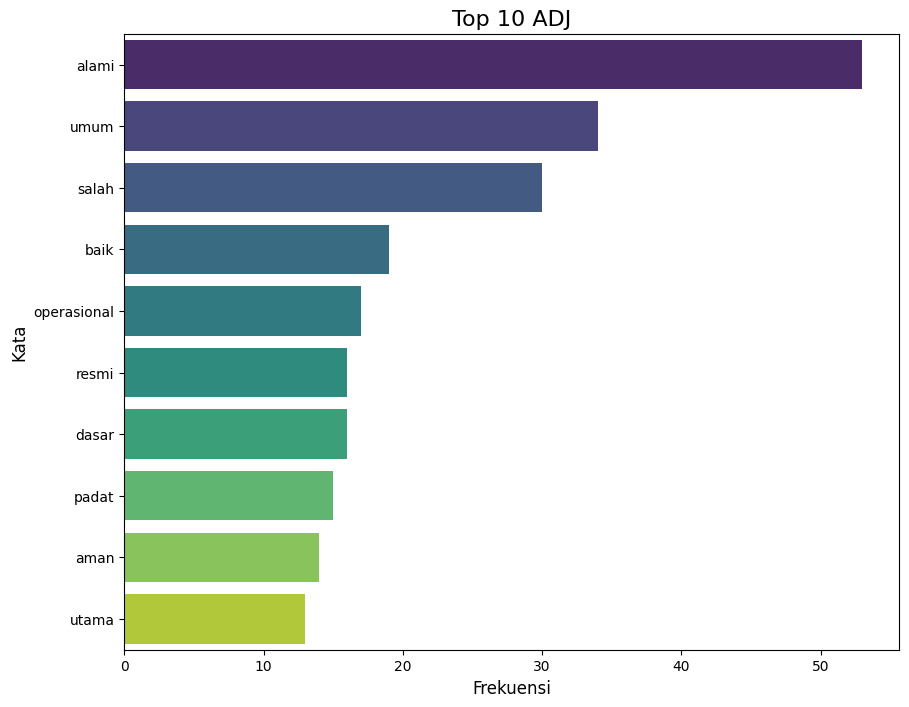

C:\Users\Wede\AppData\Local\Temp\ipykernel_33976\3791360630.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata', data=df_counts.head(10), palette='viridis')


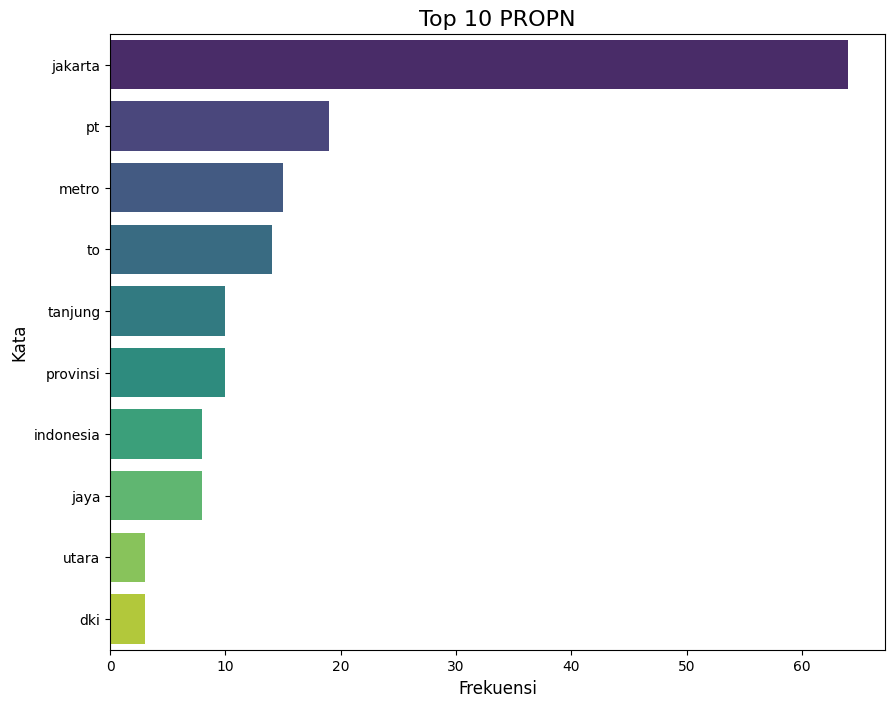

Hasil analisis untuk sentimen 'negatif' disimpan di 'hasil_pos_negatif.xlsx'
\n--- Menganalisis Sentimen: NETRAL ---


C:\Users\Wede\AppData\Local\Temp\ipykernel_33976\3791360630.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata', data=df_counts.head(10), palette='viridis')


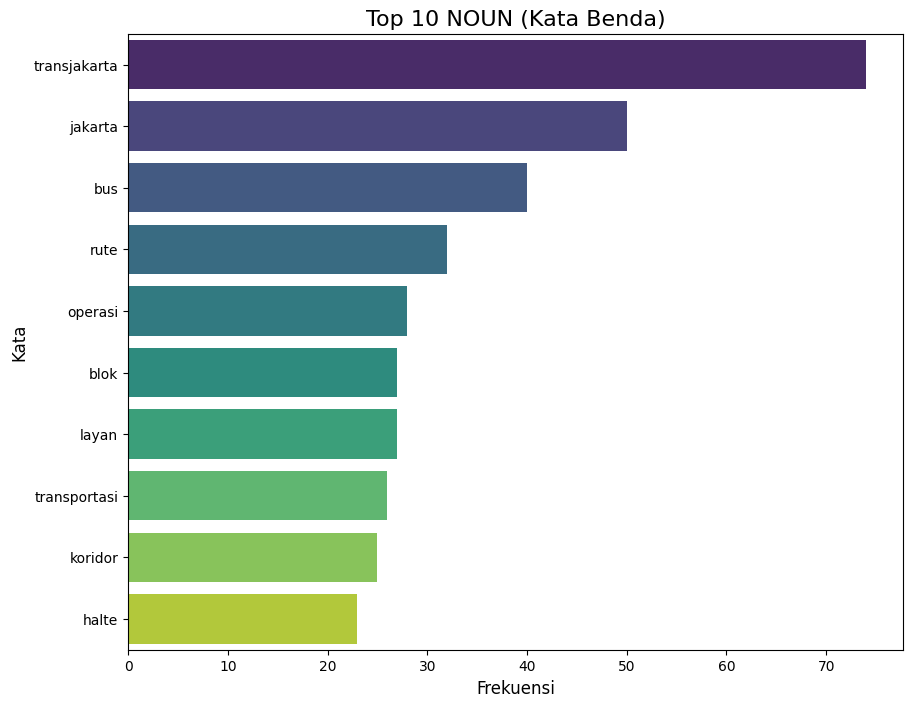

C:\Users\Wede\AppData\Local\Temp\ipykernel_33976\3791360630.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata', data=df_counts.head(10), palette='viridis')


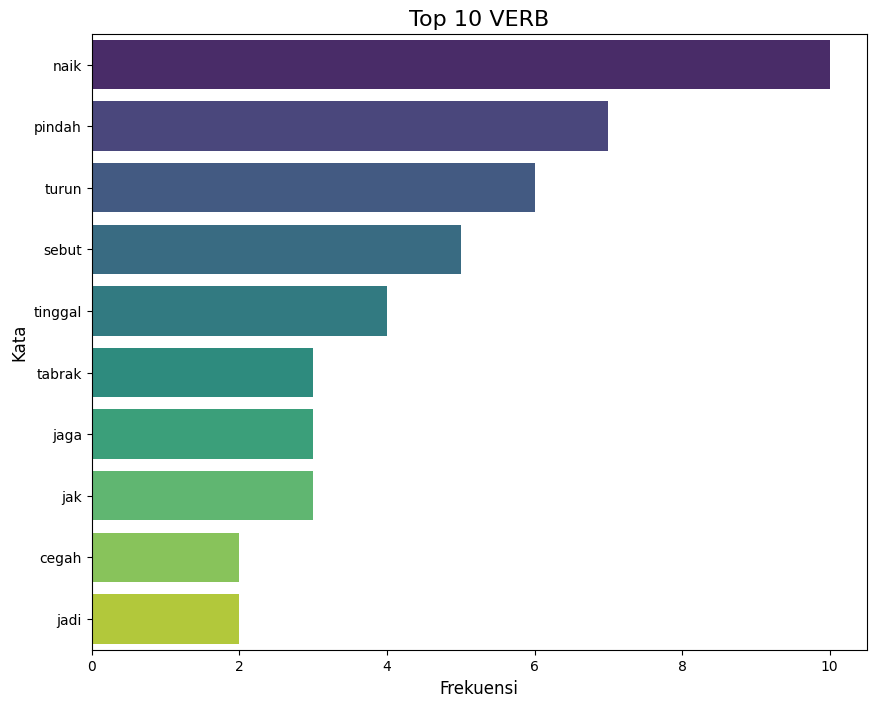

C:\Users\Wede\AppData\Local\Temp\ipykernel_33976\3791360630.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata', data=df_counts.head(10), palette='viridis')


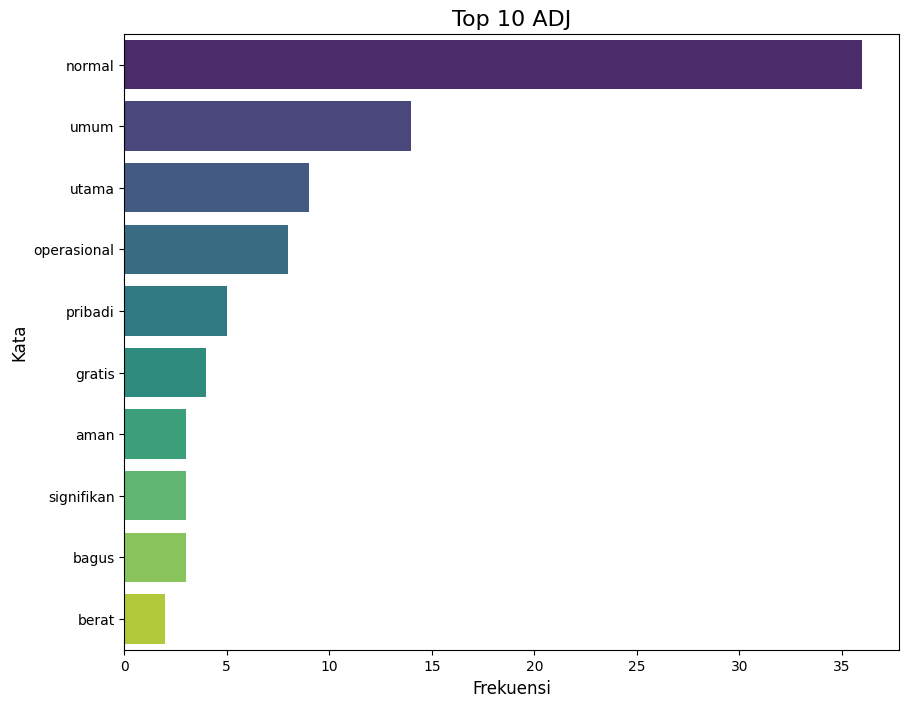

C:\Users\Wede\AppData\Local\Temp\ipykernel_33976\3791360630.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata', data=df_counts.head(10), palette='viridis')


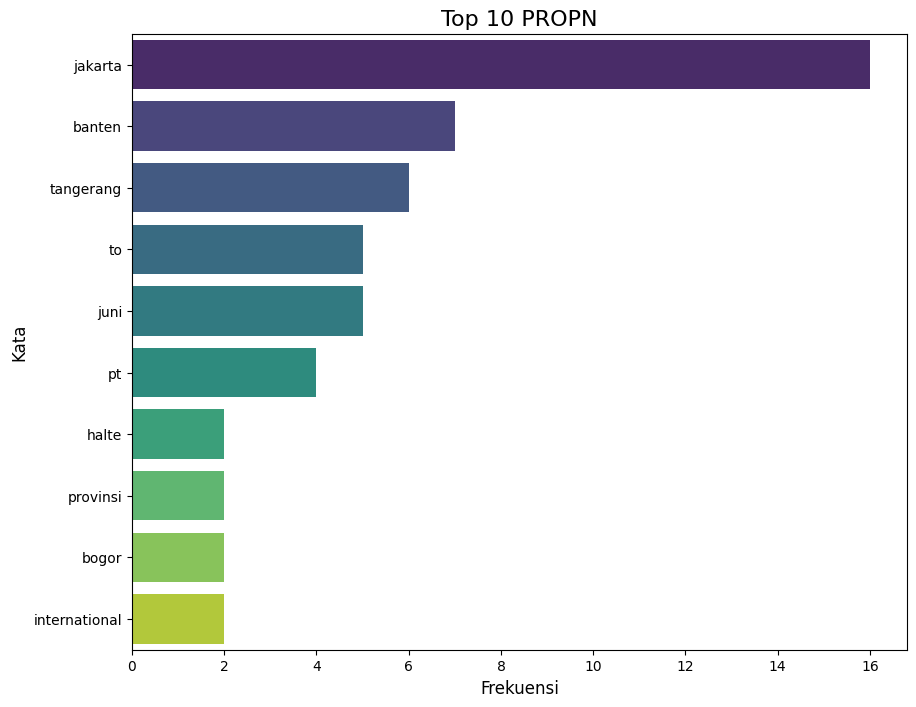

Hasil analisis untuk sentimen 'netral' disimpan di 'hasil_pos_netral.xlsx'

✅ Proses analisis POS selesai.


In [12]:
# --- Jalankan Analisis untuk Setiap Sentimen ---
analyze_pos_by_sentiment(df, 'positif')
analyze_pos_by_sentiment(df, 'negatif')
analyze_pos_by_sentiment(df, 'netral')

print("\n✅ Proses analisis POS selesai.")